<a href="https://colab.research.google.com/github/simodepth/Entities/blob/main/How_to_identify_Entities_and_Sentiment_from_a_Copy_Content_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How do search engine understand a search query?

**NLU** (Natural Language Understanding) aims to **understand** what a block of natural language is communicating. 
One way to do that is identifying key entities within a text, also known as Natural Entities Recognition (**NER**).

#Requirements and Assumptions
- Python 3 is installed 
- Google Cloud Platform account
- [NLP API Enabled](https://cloud.google.com/natural-language/docs)
- Credentials created (service account) and JSON file downloaded




In [1]:
#@title Import Modules
import os
from google.cloud import language_v1
from google.cloud.language_v1 import enums

from google.cloud import language
from google.cloud.language import types

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#@title Wrap the JSON-LD key API into a call
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/content/nlp-api-348917-9095c7f4e634.json"


In [5]:
#@title Identify Entities
text_content = "Team up with The Avengers to battle environmental enemies with our officially licensed Marvel pyjamas and character clothing, made sustainably from premium, organic and recycled fabrics. Save the world in comfort with Marvel t-shirts for kids, including other clothing such as onesies and Marvel pjs sets. Top quality and sustainable items make our Marvel clothing as comfortable as it is cool. Made ethically and build to last, you can don your superhero kit knowing you’re helping do good for the planet and supporting a family business. We know Marvel isn’t just for the kids. For adults who want a taste of the superhero life, we have a range of Marvel pyjamas and clothing so you can get in on the action. Shop from Marvel t-shirts and tops, to super cosy Marvel robes and onesies. And if you’re looking for a wardrobe essential, then get your hands on Marvel hoodies."

text_content = text_content[0:1000]

client = language_v1.LanguageServiceClient()

type_ = enums.Document.Type.PLAIN_TEXT

language = "en"
document = {"content": text_content, "type": type_, "language": language}

encoding_type = enums.EncodingType.UTF8

response = client.analyze_entities(document, encoding_type=encoding_type)

for entity in response.entities:
    print(u"Entity Name: {}".format(entity.name))

    print(u"Entity type: {}".format(enums.Entity.Type(entity.type).name))

    print(u"Salience score: {}".format(round(entity.salience,3)))

    for metadata_name, metadata_value in entity.metadata.items():
        print(u"{}: {}".format(metadata_name, metadata_value))

    print('\n')

Entity Name: Marvel
Entity type: ORGANIZATION
Salience score: 0.365


Entity Name: character clothing
Entity type: OTHER
Salience score: 0.106


Entity Name: pyjamas
Entity type: CONSUMER_GOOD
Salience score: 0.091


Entity Name: enemies
Entity type: OTHER
Salience score: 0.08


Entity Name: The Avengers
Entity type: WORK_OF_ART
Salience score: 0.048
mid: /g/11f2hl2c8y


Entity Name: premium
Entity type: OTHER
Salience score: 0.031


Entity Name: fabrics
Entity type: OTHER
Salience score: 0.031


Entity Name: t-shirts
Entity type: CONSUMER_GOOD
Salience score: 0.017


Entity Name: kids
Entity type: PERSON
Salience score: 0.017


Entity Name: comfort
Entity type: OTHER
Salience score: 0.015


Entity Name: world
Entity type: LOCATION
Salience score: 0.015


Entity Name: clothing
Entity type: CONSUMER_GOOD
Salience score: 0.013


Entity Name: onesies
Entity type: OTHER
Salience score: 0.011


Entity Name: kids
Entity type: PERSON
Salience score: 0.01


Entity Name: superhero kit
Entity ty



**"Salience score"** is a metric of calculated importance in relation to the rest of the text.

Entities with **MIDS** indicate Google has strong confidence of understanding and it likely has a comprehensive spot in the Google Knowledge Graph!




Sentiment Score: 0.5 is Positive


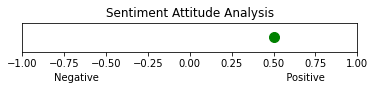

In [6]:
#@title Get and idea of the Sentiment 
document = types.Document(
    content=text_content,
    type=enums.Document.Type.PLAIN_TEXT)

sentiment = client.analyze_sentiment(document=document).document_sentiment
sscore = round(sentiment.score,4)
smag = round(sentiment.magnitude,4)

if sscore < 1 and sscore < -0.5:
  sent_label = "Very Negative"
elif sscore < 0 and sscore > -0.5:
  sent_label = "Negative"
elif sscore == 0:
  sent_label = "Neutral"
elif sscore > 0.5:
  sent_label = "Very Positive"
elif sscore > 0 and sscore < 0.5:
  sent_label = "Positive"

print('Sentiment Score: {} is {}'.format(sscore,sent_label))

predictedY =[sscore] 
UnlabelledY=[0,1,0]

if sscore < 0:
    plotcolor = 'red'
else:
    plotcolor = 'green'

plt.scatter(predictedY, np.zeros_like(predictedY),color=plotcolor,s=100)

plt.yticks([])
plt.subplots_adjust(top=0.9,bottom=0.8)
plt.xlim(-1,1)
plt.xlabel('Negative                                                            Positive')
plt.title("Sentiment Attitude Analysis")
plt.show()

Sentiment Magnitude: 5.1 is High Emotion


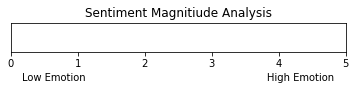

In [7]:
#@title Calculate the perceived amount of emotion in a text.
if smag > 0 and smag < 1:
  sent_m_label = "No Emotion"
elif smag > 2:
  sent_m_label = "High Emotion"
elif smag > 1 and smag < 2:
  sent_m_label = "Low Emotion"

print('Sentiment Magnitude: {} is {}'.format(smag,sent_m_label))

predictedY =[smag] 
UnlabelledY=[0,1,0]

if smag > 0 and smag < 2:
    plotcolor = 'red'
else:
    plotcolor = 'green'

plt.scatter(predictedY, np.zeros_like(predictedY),color=plotcolor,s=100)

plt.yticks([])
plt.subplots_adjust(top=0.9,bottom=0.8)
plt.xlim(0,5)
plt.xlabel('Low Emotion                                                          High Emotion')
plt.title("Sentiment Magnitiude Analysis")
plt.show()


In [8]:
#@title Calculate Categorization
response = client.classify_text(document)

for category in response.categories:
    print(u"Category name: {}".format(category.name))
    print(u"Confidence: {}%".format(int(round(category.confidence,3)*100)))

Category name: /Arts & Entertainment/Comics & Animation/Comics
Confidence: 81%
Category name: /Shopping/Apparel
Confidence: 72%


⏬ 
The NLP will process the text it’s given and try to place it into any number of preset categories where there is a high enough confidence.

